In [4]:
#Comments 
#Need to updated for this experemet

#A2: UNT
#A3: WashOut

#Strain: E-Euo-3XFlag_HctBmKt2_EuoClover

#Imaged: 10 HPI
#Treatment: 20 HPI Pen
#WashOut:  26 HPI

#GFP IN: 4 EXP: 200
#RFP IN: 18 EXP: 250

In [54]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np; np.random.seed(22)
import seaborn as sns; sns.set(color_codes=True)
import pandas as pd

import math
#from mpldatacursor import HighlightingDataCursor
#from mpldatacursor import datacursor

In [99]:
ll

total 4253
-rw-r--r-- 1 scottg 3005025 Jan 27 12:05 baseLine_subtract_ssg_ssg2.pkl
-rwxr-xr-x 1 scottg 1335871 Jan 27 15:40 HctBmKat_eoungLVA_pen_26_1.20.22_notebook.ipynb*
-rw-r--r-- 1 scottg   13076 Jan 27 11:12 Test.pdf


In [56]:
#imports all csv files in folder and concatonates the data sets from trackmate
import glob

df = pd.DataFrame()
for filename in glob.glob('/mnt/ceph/grieshaber_lab/Live_cell_data/Pen_long_1-20-22/data/*.csv'):
    data_01 = pd.read_csv(filename, sep=',')
    filename = filename.split('/')[7]
    filename = filename.split('.')[0]
    #print(filename)
    well = filename.split('_')[6]
    data_01['Well'] = well.split('-')[0]
    data_01['FOV'] = filename.split('_')[7]
    data = data_01[['Frame','Track_ID', 'Well', 'FOV', 'X', 'Y', 'Channel_1', 'Channel_2']]
    df = df.append(data,  ignore_index=True)
df['Sample_ID'] = df.Well + '-' + df.FOV
df['Sample_ID'] = df.Sample_ID + '-Track-' + df.Track_ID.astype(str)

hctbmkate_euonglva_pen_36-01-20-2022_2_MMStack_A3-Site_4
hctbmkate_euonglva_pen_36-01-20-2022_2_MMStack_A2-Site_8
hctbmkate_euonglva_pen_36-01-20-2022_2_MMStack_A3-Site_8
hctbmkate_euonglva_pen_36-01-20-2022_2_MMStack_A2-Site_2
hctbmkate_euonglva_pen_36-01-20-2022_2_MMStack_A2-Site_1
hctbmkate_euonglva_pen_36-01-20-2022_2_MMStack_A3-Site_7
hctbmkate_euonglva_pen_36-01-20-2022_2_MMStack_A3-Site_9
hctbmkate_euonglva_pen_36-01-20-2022_2_MMStack_A2-Site_0
hctbmkate_euonglva_pen_36-01-20-2022_2_MMStack_A3-Site_5
hctbmkate_euonglva_pen_36-01-20-2022_2_MMStack_A2-Site_3
hctbmkate_euonglva_pen_36-01-20-2022_2_MMStack_A3-Site_1
hctbmkate_euonglva_pen_36-01-20-2022_2_MMStack_A3-Site_2
hctbmkate_euonglva_pen_36-01-20-2022_2_MMStack_A2-Site_9
hctbmkate_euonglva_pen_36-01-20-2022_2_MMStack_A2-Site_7
hctbmkate_euonglva_pen_36-01-20-2022_2_MMStack_A3-Site_3
hctbmkate_euonglva_pen_36-01-20-2022_2_MMStack_A2-Site_4
hctbmkate_euonglva_pen_36-01-20-2022_2_MMStack_A2-Site_5
hctbmkate_euonglva_pen_36-01-20

In [57]:
df

,Frame,Track_ID,Well,FOV,X,Y,Channel_1,Channel_2,Sample_ID
0,58.0,15,A3,4,333.695043,407.316768,2203.941645,2795.015941,A3-4-Track-15
1,110.0,15,A3,4,324.146501,408.708546,2311.754341,2755.963279,A3-4-Track-15
2,75.0,15,A3,4,327.058212,408.467595,2251.422146,2568.414176,A3-4-Track-15
3,42.0,15,A3,4,326.503361,404.468185,1530.986906,3363.721321,A3-4-Track-15
4,59.0,15,A3,4,334.214209,407.247291,2350.794193,2835.510959,A3-4-Track-15
...,...,...,...,...,...,...,...,...,...
29914,139.0,290,A3,0,358.961483,158.716353,3445.592371,5839.770851,A3-0-Track-290
29915,141.0,290,A3,0,358.270540,158.994413,3360.189012,5722.247367,A3-0-Track-290
29916,134.0,290,A3,0,359.471355,155.474276,3486.141759,5781.610020,A3-0-Track-290
29917,138.0,290,A3,0,358.415734,158.234342,3416.097353,5773.590094,A3-0-Track-290


In [58]:
#subtract baseline new using min value
def subtract_bl(in_df):
    traces = in_df
    traces_p = traces.pivot_table(index='Frame', columns='Sample_ID', values='Channel_1')
    df_test2 = pd.DataFrame()
    for columns in traces_p:
        minvalue = traces_p[columns].min()
        base_sub = lambda x: x-minvalue
        df_test = in_df[in_df['Sample_ID']==columns]
        df_test['bc_channel_1'] = df_test['Channel_1']-minvalue
        df_test2 = df_test2.append(df_test)
    return df_test2
    
df_bl = subtract_bl(df)

/opt/modules/devel/python/3.6.7/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [59]:
#subtract baseline new using min value
def subtract_bl(in_df):
    traces = in_df
    traces_p = traces.pivot_table(index='Frame', columns='Sample_ID', values='Channel_2')
    df_test2 = pd.DataFrame()
    for columns in traces_p:
        minvalue = traces_p[columns].min()
        #base_sub = lambda x: x-minvalue
        df_test = in_df[in_df['Sample_ID']==columns]
        df_test['bc_channel_2'] = df_test['Channel_2']-minvalue
        df_test2 = df_test2.append(df_test)
    return df_test2
    
df_bl = subtract_bl(df_bl)

/opt/modules/devel/python/3.6.7/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [60]:
df_f = df_bl

In [61]:
df_bl

,Frame,Track_ID,Well,FOV,X,Y,Channel_1,Channel_2,Sample_ID,bc_channel_1,bc_channel_2
10406,66.0,103,A2,0,96.799354,635.077926,580.246798,2938.404782,A2-0-Track-103,120.639909,1431.851694
10407,64.0,103,A2,0,91.446735,632.419219,567.403359,3051.077142,A2-0-Track-103,107.796470,1544.524054
10408,86.0,103,A2,0,93.669514,631.240545,630.045545,3260.943638,A2-0-Track-103,170.438656,1754.390549
10409,123.0,103,A2,0,105.680098,626.026609,707.766866,3103.926558,A2-0-Track-103,248.159977,1597.373470
10410,127.0,103,A2,0,103.964208,627.567307,739.424993,3184.831198,A2-0-Track-103,279.818104,1678.278110
...,...,...,...,...,...,...,...,...,...,...,...
9551,62.0,57,A3,9,509.178942,626.623590,439.477939,2503.280956,A3-9-Track-57,67.977227,1043.175064
9552,82.0,57,A3,9,516.719046,627.090854,452.268716,2839.746940,A3-9-Track-57,80.768005,1379.641048
9553,94.0,57,A3,9,523.153152,617.242223,512.808995,2608.076003,A3-9-Track-57,141.308284,1147.970111
9554,44.0,57,A3,9,505.021147,616.570100,457.831198,4669.411329,A3-9-Track-57,86.330487,3209.305437


In [62]:
#filtering out inclusion near the edges of the field of view.
df2 = df_f[~(df_f['X']<10)]
df2 = df2[~(df2['X']>670)]
df2 = df2[~(df2['Y']<10)]
df2 = df2[~(df2['Y']>670)]
df2 = df_f

In [63]:
totalFrames = 146
startTime = 10
interval = 0.5

frame_dict = {}
for i in range(totalFrames):
    if i == 0:
        frame = i 
        frame_dict[frame] = startTime+1
    else:
        frame = i 
        startTime += interval
        frame_dict[frame] = startTime+1
#frame_dict

In [64]:
df2['Time'] = df2['Frame'].map(frame_dict)

In [65]:
df2.to_pickle("baseLine_subtract_ssg_ssg2.pkl")

In [66]:
df2 = pd.read_pickle("baseLine_subtract_ssg_ssg2.pkl")

In [67]:
df2

,Frame,Track_ID,Well,FOV,X,Y,Channel_1,Channel_2,Sample_ID,bc_channel_1,bc_channel_2,Time
10406,66.0,103,A2,0,96.799354,635.077926,580.246798,2938.404782,A2-0-Track-103,120.639909,1431.851694,44.0
10407,64.0,103,A2,0,91.446735,632.419219,567.403359,3051.077142,A2-0-Track-103,107.796470,1544.524054,43.0
10408,86.0,103,A2,0,93.669514,631.240545,630.045545,3260.943638,A2-0-Track-103,170.438656,1754.390549,54.0
10409,123.0,103,A2,0,105.680098,626.026609,707.766866,3103.926558,A2-0-Track-103,248.159977,1597.373470,72.5
10410,127.0,103,A2,0,103.964208,627.567307,739.424993,3184.831198,A2-0-Track-103,279.818104,1678.278110,74.5
...,...,...,...,...,...,...,...,...,...,...,...,...
9551,62.0,57,A3,9,509.178942,626.623590,439.477939,2503.280956,A3-9-Track-57,67.977227,1043.175064,42.0
9552,82.0,57,A3,9,516.719046,627.090854,452.268716,2839.746940,A3-9-Track-57,80.768005,1379.641048,52.0
9553,94.0,57,A3,9,523.153152,617.242223,512.808995,2608.076003,A3-9-Track-57,141.308284,1147.970111,58.0
9554,44.0,57,A3,9,505.021147,616.570100,457.831198,4669.411329,A3-9-Track-57,86.330487,3209.305437,33.0


In [68]:
#want to make a list of Sample_IDs that have signal at two time points.
df_f1 = df2['Sample_ID'][df2['Time']==20]
df_f2 = df2['Sample_ID'][df2['Time']==40]
df_f3 = df_f1[df_f1.isin(df_f2)]
df3 = df2[df2['Sample_ID'].isin(df_f3)]

In [69]:
df3

,Frame,Track_ID,Well,FOV,X,Y,Channel_1,Channel_2,Sample_ID,bc_channel_1,bc_channel_2,Time
9730,117.0,18,A2,0,406.519389,290.433188,26397.832052,4460.930828,A2-0-Track-18,26013.572445,3407.976658,69.5
9731,78.0,18,A2,0,386.946353,308.903164,17787.845716,3828.847424,A2-0-Track-18,17403.586109,2775.893254,50.0
9732,130.0,18,A2,0,408.761191,283.718867,30334.013664,5274.894677,A2-0-Track-18,29949.754056,4221.940507,76.0
9733,33.0,18,A2,0,400.000536,293.077238,896.630231,2020.281810,A2-0-Track-18,512.370623,967.327640,27.5
9734,92.0,18,A2,0,392.802559,302.094942,20541.078281,3884.926558,A2-0-Track-18,20156.818673,2831.972388,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9197,21.0,29,A3,9,625.562950,464.419155,400.285511,1555.932252,A3-9-Track-29,20.106462,136.816966,21.5
9198,44.0,29,A3,9,616.208839,479.960411,1651.858810,10814.545403,A3-9-Track-29,1271.679761,9395.430117,33.0
9199,62.0,29,A3,9,619.934794,482.460956,1809.414745,8816.758326,A3-9-Track-29,1429.235696,7397.643040,42.0
9200,70.0,29,A3,9,611.737760,464.129779,1350.074011,10283.913749,A3-9-Track-29,969.894962,8864.798463,46.0


In [70]:
#Samples
UNT = df3[df3['Sample_ID'].str.contains("A2").fillna(False)]
WSH = df3[df3['Sample_ID'].str.contains("A3").fillna(False)]

In [71]:
UNT

,Frame,Track_ID,Well,FOV,X,Y,Channel_1,Channel_2,Sample_ID,bc_channel_1,bc_channel_2,Time
9730,117.0,18,A2,0,406.519389,290.433188,26397.832052,4460.930828,A2-0-Track-18,26013.572445,3407.976658,69.5
9731,78.0,18,A2,0,386.946353,308.903164,17787.845716,3828.847424,A2-0-Track-18,17403.586109,2775.893254,50.0
9732,130.0,18,A2,0,408.761191,283.718867,30334.013664,5274.894677,A2-0-Track-18,29949.754056,4221.940507,76.0
9733,33.0,18,A2,0,400.000536,293.077238,896.630231,2020.281810,A2-0-Track-18,512.370623,967.327640,27.5
9734,92.0,18,A2,0,392.802559,302.094942,20541.078281,3884.926558,A2-0-Track-18,20156.818673,2831.972388,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17148,121.0,46,A2,9,144.659150,139.783156,15979.530885,6456.866496,A2-9-Track-46,15557.603188,4782.126388,71.5
17149,116.0,46,A2,9,145.611330,143.023090,15083.762027,6627.947054,A2-9-Track-46,14661.834330,4953.206946,69.0
17150,43.0,46,A2,9,148.206016,144.095187,1554.090521,2601.878736,A2-9-Track-46,1132.162824,927.138628,32.5
17151,64.0,46,A2,9,145.649023,143.764891,5869.094506,3636.868488,A2-9-Track-46,5447.166809,1962.128380,43.0


In [32]:
#filter for max grater then a set threshold before a time
# 
# Set boolean for sample ID where Max value after time of min value is > 10 frames later.
# Need to add a additinal factor to only a max value before a passed value
def filterI(in_df, threshold, time):
    filter_df=in_df[in_df['Time']==time]
    traces_p = filter_df.pivot_table(index='Time', columns='Sample_ID', values='bc_channel_1')
    df_pass = pd.DataFrame(columns=['Sample_ID', 'pass'])
    for columns in traces_p.columns:
        max_value = traces_p[columns].max()
        if max_value > threshold:
            df_pass = df_pass.append({'Sample_ID':columns, 'pass': True}, ignore_index=True)
            
    new_df = pd.merge(in_df, df_pass,  how='right', on=['Sample_ID'])
    return new_df
     
UNT_f      =   filterI(UNT ,8000, 50)
WSH_f      =   filterI(WSH ,8000, 50)


#This works


In [52]:
#filter for max less then a set threshold before a time
# 
# Set boolean for sample ID where Max value after time of min value is > 10 frames later.
# Need to add a additinal factor to only a max value before a passed value
def filterII(in_df, threshold, time):
    filter_df=in_df[in_df['Time']==time]
    traces_p = filter_df.pivot_table(index='Time', columns='Sample_ID', values='bc_channel_1')
    df_pass = pd.DataFrame(columns=['Sample_ID', 'pass'])
    for columns in traces_p.columns:
        max_value = traces_p[columns].max()
        if max_value < threshold:
            df_pass = df_pass.append({'Sample_ID':columns, 'pass': True}, ignore_index=True)
            
    new_df = pd.merge(in_df, df_pass,  how='right', on=['Sample_ID'])
    return new_df
     
UNT_f2  =   filterII(UNT_f,40000, 70)
WSH_f2  =   filterII(WSH_f,40000, 70)
#This works


In [53]:
#need new filter for finding a max before a time
# 
# Set boolean for sample ID where Max value after time of min value is > 10 frames later.
# Need to add a additinal factor to only a max value before a passed value
def filterIII(in_df, threshold, time):
    filter_df=in_df[in_df['Time']==time]
    traces_p = filter_df.pivot_table(index='Time', columns='Sample_ID', values='bc_channel_2')
    df_pass = pd.DataFrame(columns=['Sample_ID', 'pass'])
    for columns in traces_p.columns:
        max_value = traces_p[columns].max()
        if max_value < threshold:
            df_pass = df_pass.append({'Sample_ID':columns, 'pass': True}, ignore_index=True)
            
    new_df = pd.merge(in_df, df_pass,  how='right', on=['Sample_ID'])
    return new_df
     
UNT_f3  =   filterIII(UNT_f2,100000, 50)
WSH_f3  =   filterIII(WSH_f2,100000, 20)
#This works


In [54]:
#need new filter for finding a max before a time
# 
# Set boolean for sample ID where Max value after time of min value is > 10 frames later.
# Need to add a additinal factor to only a max value before a passed value
def filterIIIII(in_df, threshold, time):
    filter_df=in_df[in_df['Time']==time]
    traces_p = filter_df.pivot_table(index='Time', columns='Sample_ID', values='bc_channel_2')
    df_pass = pd.DataFrame(columns=['Sample_ID', 'pass'])
    for columns in traces_p.columns:
        max_value = traces_p[columns].max()
        if max_value < threshold:
            df_pass = df_pass.append({'Sample_ID':columns, 'pass': True}, ignore_index=True)
            
    new_df = pd.merge(in_df, df_pass,  how='right', on=['Sample_ID'])
    return new_df
     
UNT_f4  =   filterIIIII(UNT_f3,100000, 50)
WSH_f4  =   filterIIIII(WSH_f3,100000, 50)
#This works


/home/rickettsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Passing 'suffixes' which cause duplicate columns {'pass_x'} in the result is deprecated and will raise a MergeError in a future version.
  


In [55]:
#need new filter for finding a max before a time
# 
# Set boolean for sample ID where Max value after time of min value is > 10 frames later.
# Need to add a additinal factor to only a max value before a passed value
def filterIIII(in_df, threshold, time):
    filter_df=in_df[in_df['Time']==time]
    traces_p = filter_df.pivot_table(index='Time', columns='Sample_ID', values='bc_channel_2')
    df_pass = pd.DataFrame(columns=['Sample_ID', 'pass'])
    for columns in traces_p.columns:
        max_value = traces_p[columns].max()
        if max_value > threshold:
            df_pass = df_pass.append({'Sample_ID':columns, 'pass': True}, ignore_index=True)
            
    new_df = pd.merge(in_df, df_pass,  how='right', on=['Sample_ID'])
    return new_df
     
UNT_f5  =   filterIIII(UNT_f4,5000,70)
WSH_f5  =   filterIIII(WSH_f4,5000,70)

#This works


In [22]:
def pivot(in_df, channel):
    in_df_p = in_df.pivot_table(index='Time', columns='Sample_ID', values=channel)
    #in_df_p = in_df.pivot_table(index='Time', columns='Sample_ID', values=channel)
    in_df_p['mean'], in_df_p['std'], in_df_p['HPI'] = in_df_p.mean(axis=1), in_df_p.std(axis=1), in_df_p.index
    return in_df_p

In [72]:
HcB_UNT_p                = pivot(UNT,  'bc_channel_1')
HcB_WSH_p                = pivot(WSH,  'bc_channel_1')
#_f4_f_f5_f5_f5
Euo_UNT_p                = pivot(UNT,  'bc_channel_2')
Euo_WSH_p                = pivot(WSH,  'bc_channel_2')

In [73]:
Euo_WSH_p

Sample_ID,A3-0-Track-44,A3-0-Track-49,A3-0-Track-53,A3-1-Track-46,A3-1-Track-47,A3-1-Track-50,A3-2-Track-18,A3-2-Track-28,A3-3-Track-14,A3-3-Track-21,...,A3-7-Track-7,A3-7-Track-9,A3-8-Track-10,A3-8-Track-11,A3-8-Track-14,A3-8-Track-16,A3-9-Track-29,mean,std,HPI
Time,,,,,,,,,,,,,,,,,,,,,
16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,29.192428,NaN,NaN,NaN,NaN,51.490179,31.533782,16.0
16.5,NaN,NaN,NaN,NaN,NaN,NaN,210.784230,NaN,NaN,NaN,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,70.261410,121.696332,16.5
17.0,NaN,NaN,NaN,NaN,NaN,NaN,80.123826,NaN,NaN,NaN,...,NaN,NaN,54.692286,NaN,NaN,NaN,NaN,76.381156,20.080846,17.0
17.5,NaN,NaN,NaN,NaN,NaN,NaN,683.153999,NaN,12.772274,NaN,...,0.0000,NaN,203.453459,58.613436,NaN,NaN,NaN,169.062162,235.960622,17.5
18.0,NaN,NaN,NaN,NaN,NaN,NaN,14.274694,NaN,0.000000,NaN,...,16.6846,NaN,269.538002,0.000000,104.667521,NaN,NaN,80.416833,88.283746,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81.0,2359.658696,1838.767720,5206.587247,2319.161685,NaN,NaN,NaN,3170.481070,4572.592087,NaN,...,NaN,3322.603473,4102.090806,2100.903217,3656.544549,NaN,NaN,3040.705424,1173.363769,81.0
81.5,2608.844293,1787.492172,5142.604896,2221.198406,NaN,NaN,NaN,3342.867635,4502.762027,NaN,...,NaN,NaN,4002.306006,2126.094791,3616.061486,NaN,NaN,2994.508848,1198.294031,81.5
82.0,2562.893823,1728.074295,5069.552804,2327.553658,NaN,NaN,NaN,3506.110162,4373.256761,NaN,...,NaN,NaN,4307.199829,2175.107600,3548.806149,NaN,NaN,3079.595028,1158.346571,82.0


In [74]:
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import LogLocator
c = sns.color_palette('Set1',16).as_hex()
c[1]

'#377eb8'

<IPython.core.display.Javascript object>


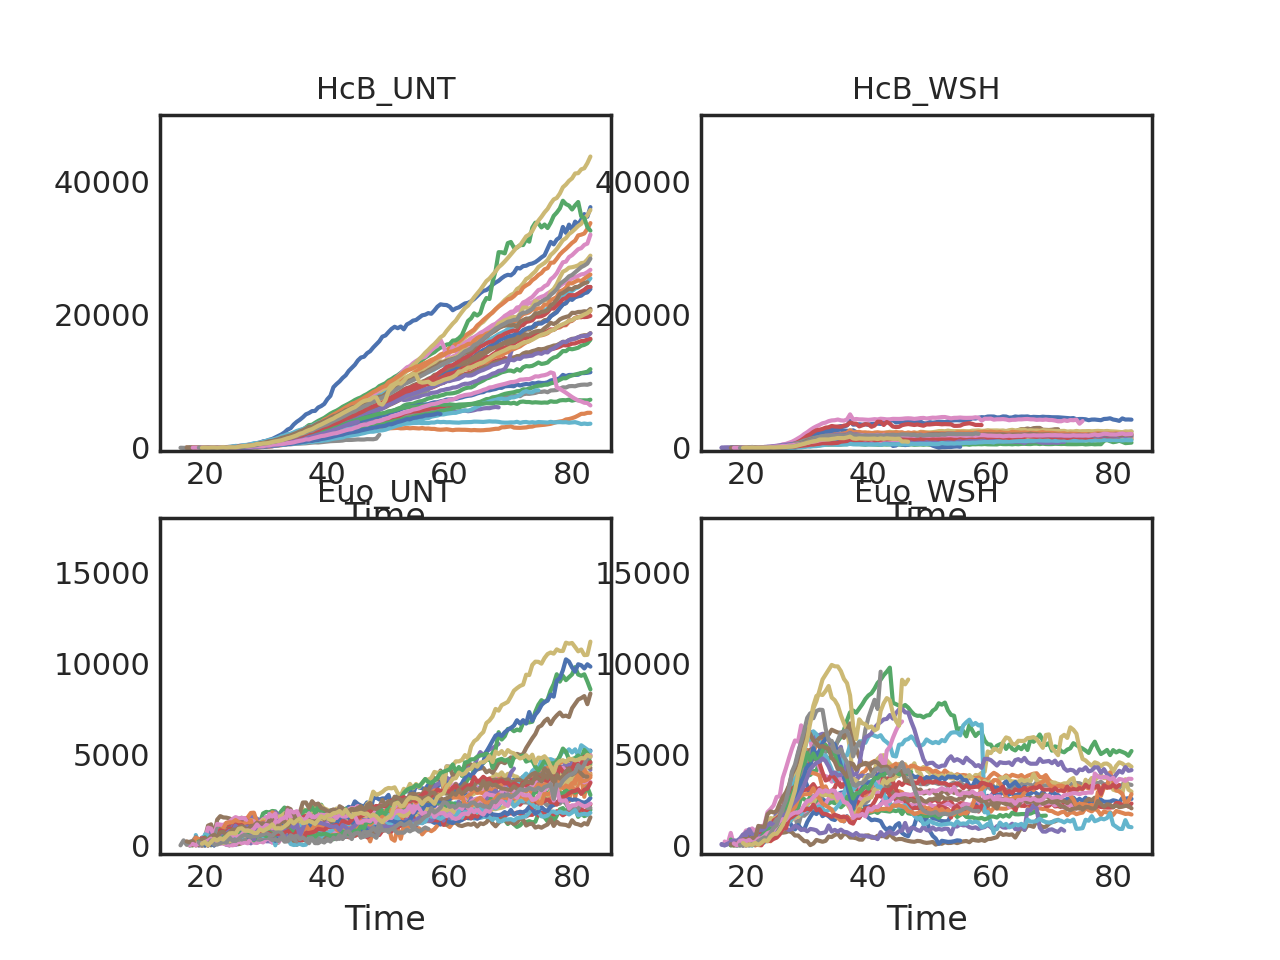

In [77]:
#(x, y) to (x+dx, y+dy)
#%matplotlib inline
%matplotlib notebook
with plt.style.context('seaborn-white'):
    fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(ncols=2, nrows=2)
    HcB_UNT_p.drop(columns=['std', 'mean','HPI']).plot(legend=False, ax=ax1)
    HcB_WSH_p.drop(columns=['std', 'mean','HPI']).plot(legend=False, ax=ax2)
    Euo_UNT_p.drop(columns=['std', 'mean','HPI']).plot(legend=False, ax=ax3)
    Euo_WSH_p.drop(columns=['std', 'mean','HPI']).plot(legend=False, ax=ax4)
    
    ax1.set_ylim([-500, 50000])
    ax2.set_ylim([-500, 50000])
    ax3.set_ylim([-500, 18000])
    ax4.set_ylim([-500, 18000])
    
    #ax1.set_xlim([8, 60])
    #ax2.set_xlim([8, 60])
    #ax3.set_xlim([8, 60])
    #ax4.set_xlim([8, 60])
    
    ax1.set_title('HcB_UNT', fontsize=11)
    ax2.set_title('HcB_WSH', fontsize=11)
    ax3.set_title('Euo_UNT', fontsize=11)
    ax4.set_title('Euo_WSH', fontsize=11)
    
    #ax1.arrow(36, 350, 0, 1000,   color=c[1], lw=1, alpha=1)
    #ax2.arrow(36, 350, 0, 1000,   color=c[1], lw=1, alpha=1)
    #ax3.arrow(36, 350, 0, 1000,   color=c[1], lw=1, alpha=1)
    #ax4.arrow(36, 350, 0, 1000,   color=c[1], lw=1, alpha=1)

In [78]:
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import LogLocator
c = sns.color_palette('Set1',16).as_hex()
c[1]

'#377eb8'

<IPython.core.display.Javascript object>


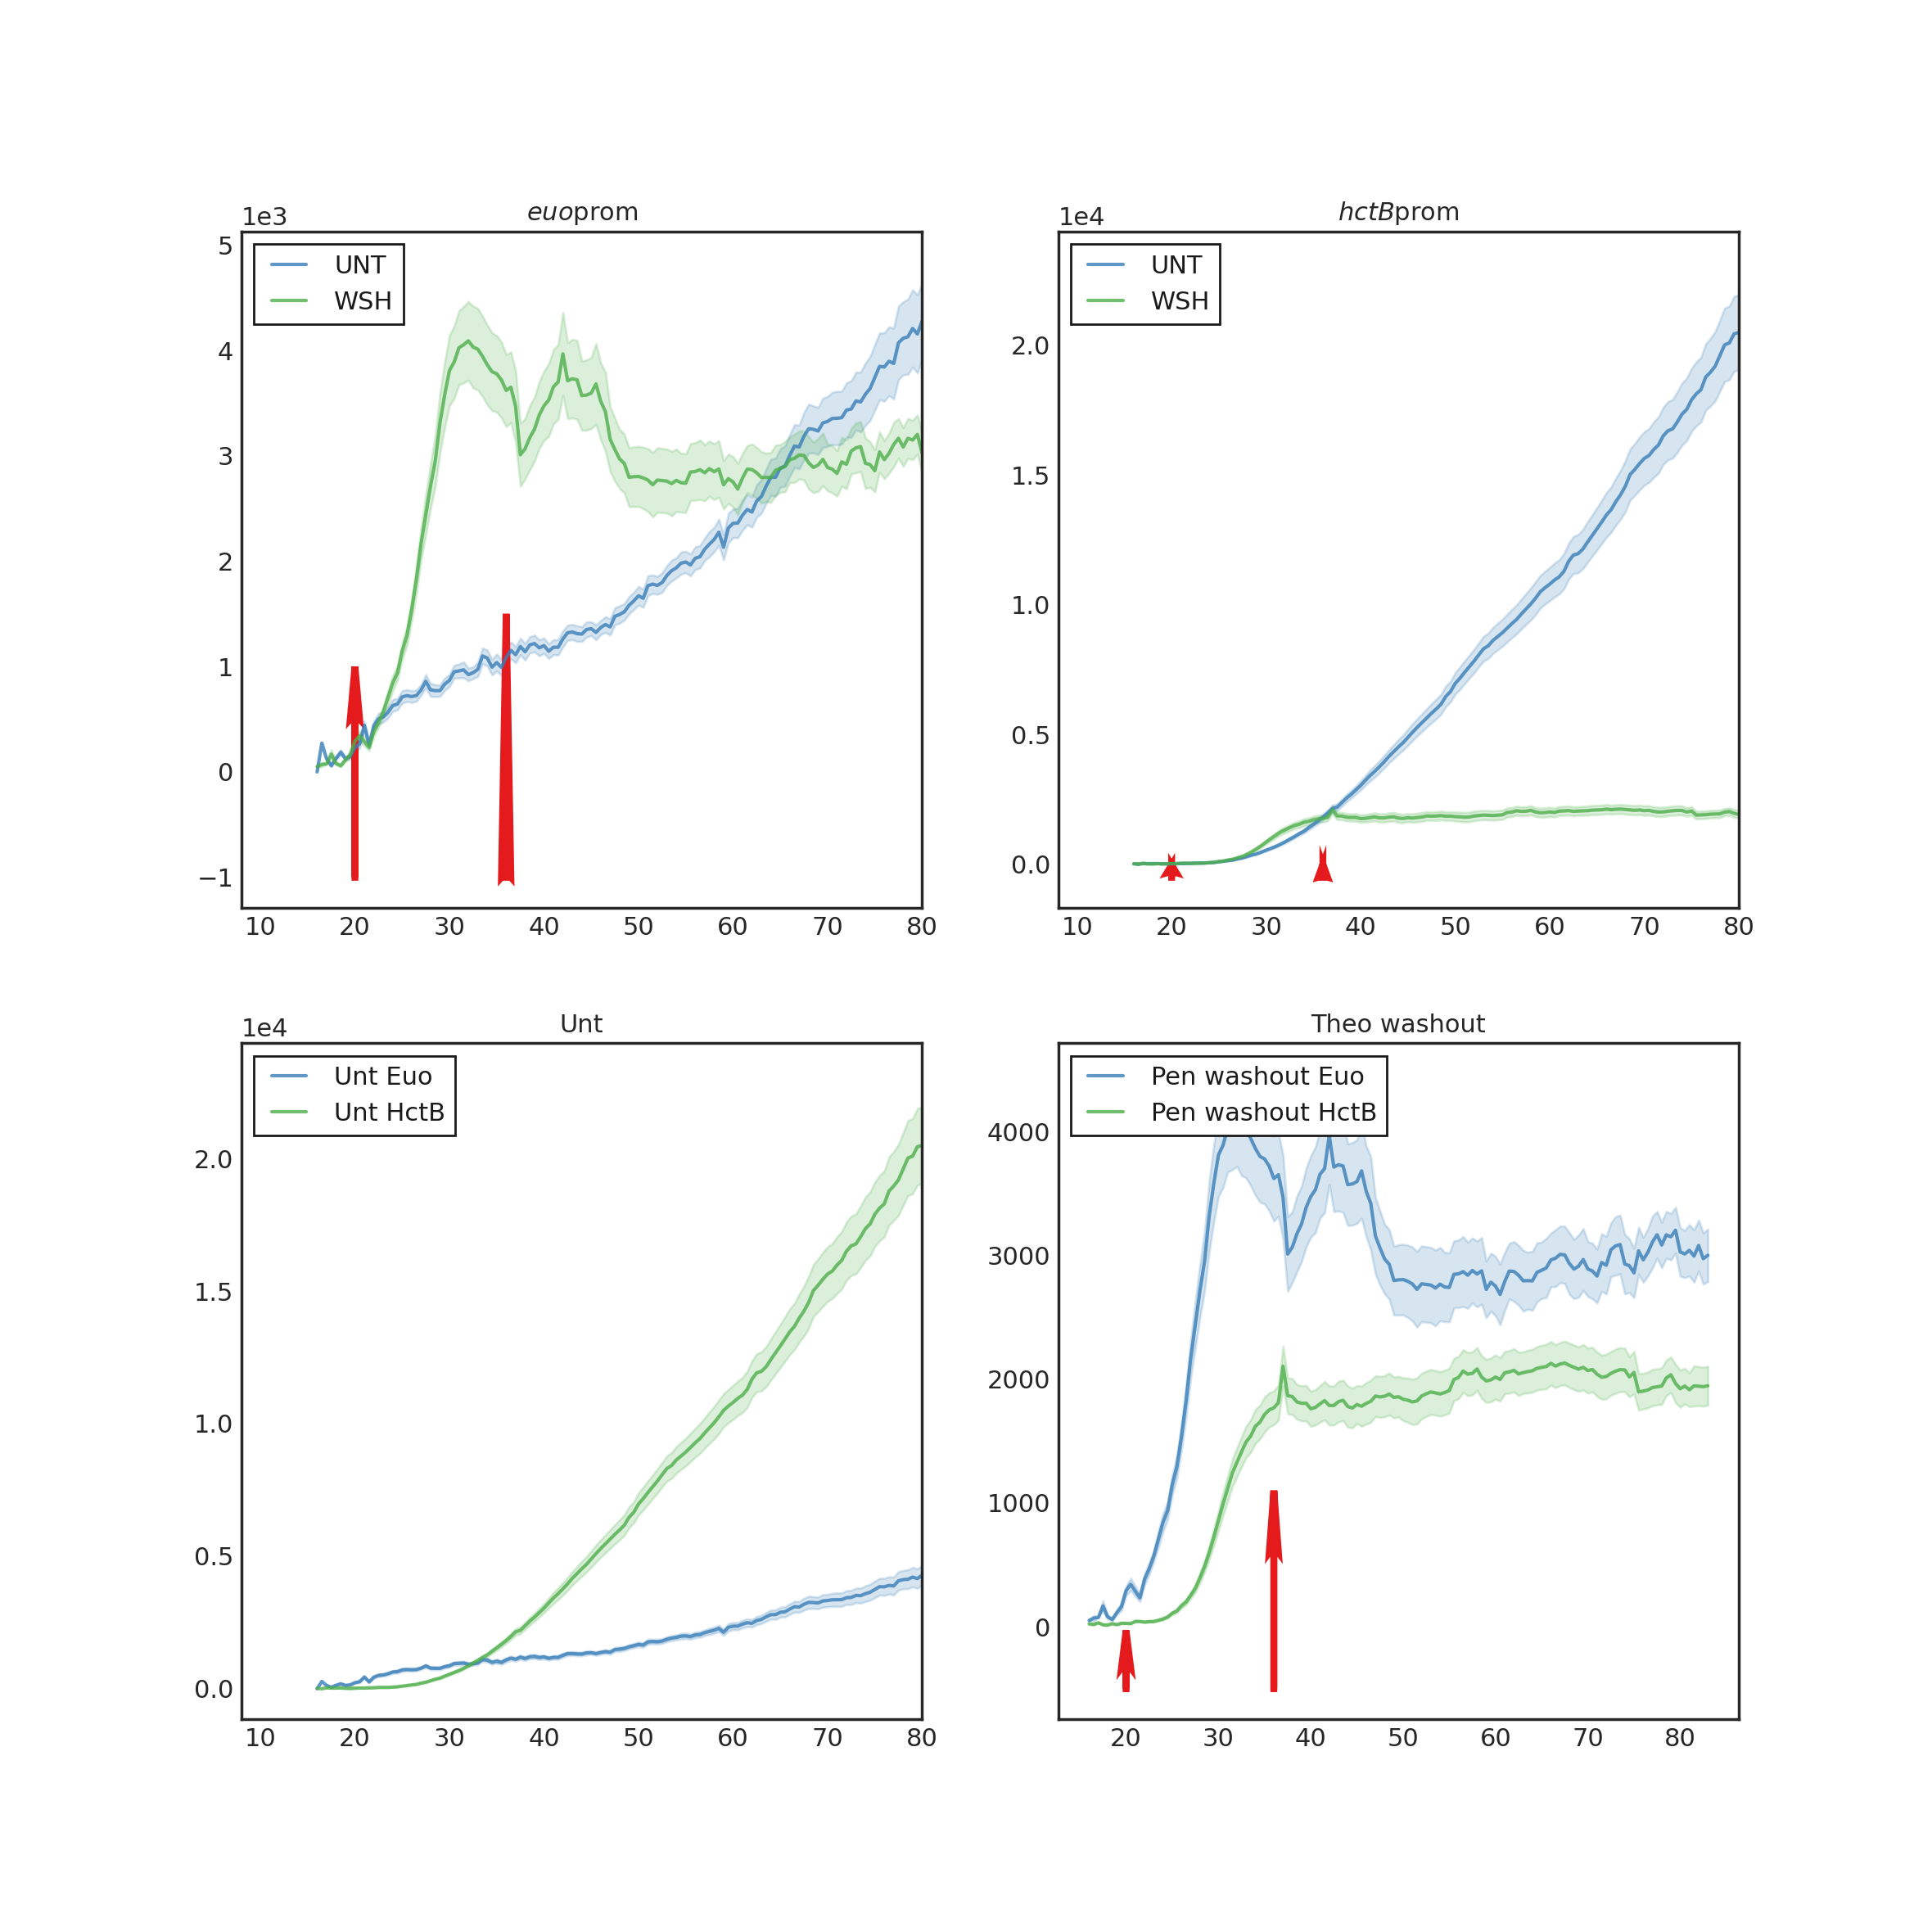

In [98]:
with plt.style.context('seaborn-white'):
    #%matplotlib inline
    fig, ((ax1,ax2),(ax3, ax4)) = plt.subplots(ncols=2, nrows=2)
    #fig.tight_layout()
   
    def plot_sample_1(sample, color, name, style, mstyle, fcolor, i):
        ax1.plot(sample.index, sample['mean']*i, color, label=name, linestyle = style, marker=mstyle, alpha=0.8, ms = 5, markerfacecolor=fcolor, markeredgecolor=color, markeredgewidth=1)     
        #ax2.fill_between(sample.index, sample['mean']-sample['std'], sample['mean']+sample['std'], color=color, alpha=0.15)
        ax1.fill_between(sample.index, sample['mean']*i-(sample['std']*i)/math.sqrt(len(sample.columns)), sample['mean']*i+(sample['std']*i)/math.sqrt(len(sample.columns)), color=color, alpha=0.2)
    
    plot_sample_1(Euo_UNT_p     , c[1],  'UNT' , '-', '', 'None', 1)
    plot_sample_1(Euo_WSH_p     , c[2],  'WSH' , '-', '', 'None', 1)

    def plot_sample_2(sample, color, name, style, mstyle, fcolor, i):
        ax2.plot(sample.index, sample['mean']*i, color, label=name, linestyle = style, marker=mstyle, alpha=0.8, ms = 5, markerfacecolor=fcolor, markeredgecolor=color, markeredgewidth=1)     
        #ax2.fill_between(sample.index, sample['mean']-sample['std'], sample['mean']+sample['std'], color=color, alpha=0.15)
        ax2.fill_between(sample.index, sample['mean']*i-(sample['std']*i)/math.sqrt(len(sample.columns)), sample['mean']*i+(sample['std']*i)/math.sqrt(len(sample.columns)), color=color, alpha=0.2) 

    plot_sample_2(HcB_UNT_p     , c[1],  'UNT' , '-', '', 'None', 1)
    plot_sample_2(HcB_WSH_p     , c[2],  'WSH' , '-', '', 'None', 1)
   
    def plot_sample_3(sample, color, name, style, mstyle, fcolor, i):
        ax3.plot(sample.index, sample['mean']*i, color, label=name, linestyle = style, marker=mstyle, alpha=0.8, ms = 5, markerfacecolor=fcolor, markeredgecolor=color, markeredgewidth=1)     
        #ax2.fill_between(sample.index, sample['mean']-sample['std'], sample['mean']+sample['std'], color=color, alpha=0.15)
        ax3.fill_between(sample.index, sample['mean']*i-(sample['std']*i)/math.sqrt(len(sample.columns)), sample['mean']*i+(sample['std']*i)/math.sqrt(len(sample.columns)), color=color, alpha=0.2)
    
    plot_sample_3(Euo_UNT_p     , c[1],  'Unt Euo' , '-', '', 'None', 1)
    plot_sample_3(HcB_UNT_p     , c[2],  'Unt HctB' , '-', '', 'None', 1)

    def plot_sample_4(sample, color, name, style, mstyle, fcolor, i):
        ax4.plot(sample.index, sample['mean']*i, color, label=name, linestyle = style, marker=mstyle, alpha=0.8, ms = 5, markerfacecolor=fcolor, markeredgecolor=color, markeredgewidth=1)     
        #ax2.fill_between(sample.index, sample['mean']-sample['std'], sample['mean']+sample['std'], color=color, alpha=0.15)
        ax4.fill_between(sample.index, sample['mean']*i-(sample['std']*i)/math.sqrt(len(sample.columns)), sample['mean']*i+(sample['std']*i)/math.sqrt(len(sample.columns)), color=color, alpha=0.2)   

    plot_sample_4(Euo_WSH_p     , c[1],  'Pen washout Euo' , '-', '', 'None', 1)
    plot_sample_4(HcB_WSH_p     , c[2],  'Pen washout HctB' , '-', '', 'None', 1)

with plt.style.context('classic'):
    ax1.legend(loc='upper left',  fontsize=11)
    ax2.legend(loc='upper left',  fontsize=11)
    ax3.legend(loc='upper left',  fontsize=11)
    ax4.legend(loc='upper left',  fontsize=11)

    ax1.set_title('$euo$prom', fontsize=11)
    ax2.set_title('$hctB$prom', fontsize=11)
    ax3.set_title('Unt', fontsize=11)
    ax4.set_title('Theo washout', fontsize=11)

    ax1.set_xlim([8, 80])
    ax2.set_xlim([8, 80])
    ax3.set_xlim([8, 80])

    ax1.ticklabel_format( axis="y", style="sci", scilimits=(0,0))
    ax2.ticklabel_format( axis="y", style="sci", scilimits=(0,0))
    ax3.ticklabel_format( axis="y", style="sci", scilimits=(0,0))
 
    #ax1.set_ylim([-100, 10000])
    #ax2.set_ylim([-100, 10000])
    #ax3.set_ylim([-10, 2000])

    ax1.arrow(36, -1000, 0, 0,   color=c[0], lw=3, alpha=1, head_width = 1, length_includes_head = False, head_length = 50, overhang = 50)
    ax2.arrow(36, -500, 0, 0,   color=c[0], lw=3, alpha=1, head_width = 1, length_includes_head = False, head_length = 50, overhang = 10)
    ax1.arrow(20, -1000, 0, 1500,   color=c[0], lw=3, alpha=1, head_width = 1, length_includes_head = False, head_length = 50, overhang = 10)
    ax2.arrow(20, -500, 0, 170,   color=c[0], lw=3, alpha=1, head_width = 1, length_includes_head = False, head_length = 50, overhang = 6)
    #ax3.arrow(31, -1000, 0, 33000,   color=c[0], lw=3, alpha=1, head_width = 1, length_includes_head = False, head_length = 50, overhang = 50)
    ax4.arrow(36, -500, 0, 1100,   color=c[0], lw=3, alpha=1, head_width = 1, length_includes_head = False, head_length = 50, overhang = 10)
    #ax3.arrow(17, -1000, 0, 1500,   color=c[0], lw=3, alpha=1, head_width = 1, length_includes_head = False, head_length = 50, overhang = 10)
    ax4.arrow(20, -500, 0, 170,   color=c[0], lw=3, alpha=1, head_width = 1, length_includes_head = False, head_length = 50, overhang = 6)
          
    fig.set_size_inches(5.9, 5.9)
    #plt.savefig('Allproms.pdf')

NameError: name 'Euo_HctB_CIP_p' is not defined

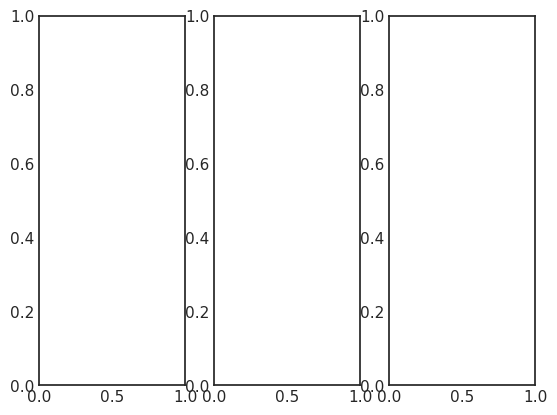

In [54]:
with plt.style.context('seaborn-white'):
    fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, nrows=1)
    #fig.tight_layout()

    def plot_sample_1(sample, color, name, style, mstyle, fcolor, i):
        ax1.plot(sample.index, sample['mean']*i, color, label=name, linestyle = style, marker=mstyle, alpha=0.8, ms = 5, markerfacecolor=fcolor, markeredgecolor=color, markeredgewidth=1)     
        #ax2.fill_between(sample.index, sample['mean']-sample['std'], sample['mean']+sample['std'], color=color, alpha=0.15)
        ax1.fill_between(sample.index, sample['mean']*i-(sample['std']*i)/math.sqrt(len(sample.columns)), sample['mean']*i+(sample['std']*i)/math.sqrt(len(sample.columns)), color=color, alpha=0.2)
    
    plot_sample_1(Euo_HctB_CIP_p + Euo_HctA_CIP_p  , c[1],  'CIP' , '-', '', 'None', 1)
    plot_sample_1(Euo_HctB_PEN_p + Euo_HctA_PEN_p   , c[3],  'PEN' , '-', '', 'None', 1)
    plot_sample_1(Euo_HctB_TPH_p + Euo_HctA_TPH_p , c[4],  'FtsI' , '-', '', 'None', 1)
    plot_sample_1(Euo_HctB_UNT_p + Euo_HctA_UNT_p , c[2],  'UNT' , '-', '', 'None', 1)

    def plot_sample_2(sample, color, name, style, mstyle, fcolor, i):
        ax2.plot(sample.index, sample['mean']*i, color, label=name, linestyle = style, marker=mstyle, alpha=0.8, ms = 5, markerfacecolor=fcolor, markeredgecolor=color, markeredgewidth=1)     
        #ax2.fill_between(sample.index, sample['mean']-sample['std'], sample['mean']+sample['std'], color=color, alpha=0.15)
        ax2.fill_between(sample.index, sample['mean']*i-(sample['std']*i)/math.sqrt(len(sample.columns)), sample['mean']*i+(sample['std']*i)/math.sqrt(len(sample.columns)), color=color, alpha=0.2)
    
    plot_sample_2(HctA_HctA_CIP_p     , c[1],  'CIP' , '-', '', 'None', 1)
    plot_sample_2(HctA_HctA_PEN_p     , c[3],  'PEN' , '-', '', 'None', 1)
    plot_sample_2(HctA_HctA_TPH_p     , c[4],  'FtsI' , '-', '', 'None', 1)
    plot_sample_2(HctA_HctA_UNT_p     , c[2],  'UNT' , '-', '', 'None', 1)
    
    def plot_sample_3(sample, color, name, style, mstyle, fcolor, i):
        ax3.plot(sample.index, sample['mean']*i, color, label=name, linestyle = style, marker=mstyle, alpha=0.8, ms = 5, markerfacecolor=fcolor, markeredgecolor=color, markeredgewidth=1)     
        #ax2.fill_between(sample.index, sample['mean']-sample['std'], sample['mean']+sample['std'], color=color, alpha=0.15)
        ax3.fill_between(sample.index, sample['mean']*i-(sample['std']*i)/math.sqrt(len(sample.columns)), sample['mean']*i+(sample['std']*i)/math.sqrt(len(sample.columns)), color=color, alpha=0.2)
    
    plot_sample_3(HctB_HctB_CIP_p     , c[1],  'CIP' , '-', '', 'None', 1)
    plot_sample_3(HctB_HctB_PEN_p     , c[3],  'PEN' , '-', '', 'None', 1)
    plot_sample_3(HctB_HctB_TPH_p     , c[4],  'FtsI' , '-', '', 'None', 1)
    plot_sample_3(HctB_HctB_UNT_p     , c[2],  'UNT' , '-', '', 'None', 1)

with plt.style.context('classic'):
    
    ax1.legend(loc='upper left',  fontsize=10)
    ax2.legend(loc='upper left',  fontsize=10)
    ax3.legend(loc='upper left',  fontsize=10)

    ax1.set_title('$euo$prom',  fontsize=14)
    ax2.set_title('$hctA$prom', fontsize=14)
    ax3.set_title('$hctB$prom', fontsize=14)

    ax1.set_xlim([8, 60])
    ax2.set_xlim([8, 60])
    ax3.set_xlim([8, 60])


    ax1.ticklabel_format( axis="y", style="sci", scilimits=(0,0))
    ax2.ticklabel_format( axis="y", style="sci", scilimits=(0,0))
    ax3.ticklabel_format( axis="y", style="sci", scilimits=(0,0))

  
    ax1.set_ylim([-100, 13000])
    ax2.set_ylim([-100, 9000])
    ax3.set_ylim([-100, 9000])

    
    #ax1.arrow(36, 0, 0, 400,   color=c[1], lw=1, alpha=1)
    #ax2.arrow(36, 0, 0, 400,   color=c[1], lw=1, alpha=1)
    #ax3.arrow(36, 0, 0, 200,   color=c[1], lw=1, alpha=1)
    #ax4.arrow(36, 0, 0, 200,   color=c[1], lw=1, alpha=1)
    #ax5.arrow(36, 0, 0, 400,   color=c[1], lw=1, alpha=1)
    #ax6.arrow(36, 0, 0, 400,   color=c[1], lw=1, alpha=1)
          
    fig.set_size_inches(14, 4)
    plt.savefig('Allproms.pdf')

In [56]:
# Calculate max, min, halfmax and time to halfmax
def halfmax(in_pd):
    in_pd_c1_p = in_pd.pivot_table(index='Sample_ID', columns='Time', values='bc_channel_1')
    in_pd_c1_p['max_c1'] = in_pd_c1_p.max(axis=1)
    in_pd_c2_p = in_pd.pivot_table(index='Sample_ID', columns='Time', values='bc_channel_2')
    in_pd_c2_p['max_c2'] = in_pd_c2_p.max(axis=1)
    #print(in_pd_c1_p)
    #in_pd_p['min'] = in_pd_p.min(axis=1)
    in_pd_c1_p['min_c1'] = 1
    in_pd_c2_p['min_c2'] = 1
    #in_pd_p['half_max'] = np.sqrt(in_pd_p['max']*in_pd_p['min'])
    #in_pd_c1_p['half_max_c1'] = np.sqrt(in_pd_c1_p['max_c1'])
    #in_pd_c2_p['half_max_c2'] = np.sqrt(in_pd_c2_p['max_c2'])
    in_pd_c1_p['half_max_c1'] = in_pd_c1_p['max_c1']/2
    in_pd_c2_p['half_max_c2'] = in_pd_c2_p['max_c2']/2
    #print(in_pd_p['half_max'])
    in_pd_f = in_pd_c1_p[['min_c1','max_c1', 'half_max_c1']]
    in_pd_f['min_c2'] = in_pd_c2_p['min_c2']
    in_pd_f['max_c2'] = in_pd_c2_p['max_c2']
    in_pd_f['half_max_c2'] = in_pd_c2_p['half_max_c2']
    in_pd_f.index.name = None
    in_pd_f['Sample_ID'] = in_pd_f.index
    #print(in_pd_c2_p['max_c2'])
    traces = in_pd
    
    traces_c1_p =       traces.pivot_table(index='Time', columns='Sample_ID', values='bc_channel_1') 
    traces_c1_p_fill =  traces_c1_p.fillna(method='bfill') #back fill to frame 0
    traces_c1_p_fill.reset_index(inplace = True)
    df_c1_f = traces_c1_p_fill
    df_c1_f.set_index(df_c1_f['Time'], inplace=True)
    
    traces_c2_p =       traces.pivot_table(index='Time', columns='Sample_ID', values='bc_channel_2') 
    traces_c2_p_fill =  traces_c2_p.fillna(method='bfill') #back fill to frame 0
    traces_c2_p_fill.reset_index(inplace = True)
    df_c2_f = traces_c2_p_fill
    df_c2_f.set_index(df_c2_f['Time'], inplace=True)
    
    time_halfmax_c1 = pd.DataFrame(columns=['Sample_ID', 'time_to_halfmax_c1'])
    time_halfmax_c2 = pd.DataFrame(columns=['Sample_ID', 'time_to_halfmax_c2'])
    for index, row in in_pd_f.iterrows():
        sampleID = row['Sample_ID']
        #print(sampleID)
        time_c1 = (df_c1_f[sampleID]-row['half_max_c1']).abs().sort_values().index[0]
        time_c2 = (df_c2_f[sampleID]-row['half_max_c2']).abs().sort_values().index[0]
      
        time_halfmax_c1 = time_halfmax_c1.append({'Sample_ID':sampleID, 'time_to_halfmax_c1': time_c1}, ignore_index=True)
        time_halfmax_c2 = time_halfmax_c2.append({'Sample_ID':sampleID, 'time_to_halfmax_c2': time_c2}, ignore_index=True)
       
    #data_summary = pd.merge(in_pd_f, time_halfmax_c1, time_halfmax_c2, on='Sample_ID')
    data_summary = pd.merge(time_halfmax_c1, time_halfmax_c2, on='Sample_ID')
    #still need to add x y coordinates at last time imaged
    df_time = df3[df3['Time']==30]
    df_time = df_time[['Sample_ID', 'X', 'Y']]
    #want to mearge with data_summary but only for Sample IDs in both)
    result = pd.merge(data_summary, df_time, how='inner', on=['Sample_ID'])
    return result

#BMEC_BC_hm      = halfmax(BMEC_BC_f)
#BMEC_BU_hm      = halfmax(BMEC_BU_f)
BMECC2_hm      = halfmax(WSH_f5)
#BMEC_CY_hm      = halfmax(BMEC_CY_f)
#HAIN_BC_hm      = halfmax(HAIN_BC_f)
#HAIN_BU_hm      = halfmax(HAIN_BU_f)
#HAIN_UN_hm      = halfmax(HAIN_UN_f)
#HAIN_CY_hm      = halfmax(HAIN_CY_f)
#Scc2_BC_hm      = halfmax(Scc2_BC_f)
#Scc2_CY_hm      = halfmax(Scc2_CY_f)
#Scc2_BU_hm      = halfmax(Scc2_BU_f)
#Scc2_UN_hm      = halfmax(Scc2_UN_f)


/home/rickettsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rickettsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rickettsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [57]:
BMECC2_hm

,Sample_ID,time_to_halfmax_c1,time_to_halfmax_c2,X,Y
0,A3-1-Track-1,30.0,55.5,129.215045,68.257334
1,A3-1-Track-2,40.5,56.0,106.343879,432.940781
2,A3-2-Track-5,26.0,45.5,78.576013,292.536478
3,A3-3-Track-10,33.0,45.5,154.241358,289.881072
4,A3-3-Track-7,26.5,48.0,341.480125,204.502378
5,A3-4-Track-11,33.0,68.0,228.545767,112.110099
6,A3-4-Track-2,28.0,47.5,195.074128,232.740360
7,A3-4-Track-5,29.0,56.0,395.538669,305.340118
8,A3-5-Track-11,29.0,43.5,106.651021,289.932645
9,A3-5-Track-9,29.0,50.0,175.630516,378.266257


In [70]:
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook, output_file
from bokeh.layouts import row
from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label
from bokeh.models import HoverTool
from collections import OrderedDict
from bokeh.layouts import layout
from bokeh.models import Toggle, BoxAnnotation, CustomJS

def pivot2(in_df, channel):
    in_df_p = in_df.pivot_table(index='Time', columns='Sample_ID', values=channel)
    in_df_p['mean'], in_df_p['std'] = in_df_p.mean(axis=1), in_df_p.std(axis=1)
    return in_df_p

output_notebook()

c = sns.color_palette('Set1',1000).as_hex()

def interactive_graph(in_df):
    in_df_p = pivot2(in_df, 'bc_channel_2')
    df_new = in_df_p[in_df_p.columns[0:-2]]
    result = halfmax(in_df)
    #result = in_df

    tools_to_show = 'box_zoom,save,hover,reset'
    p = figure(plot_height = 500, plot_width = 500,
               toolbar_location='above', tools=tools_to_show,
               # "easy" tooltips in Bokeh 0.13.0 or newer
               tooltips=[("Location","$name")])
    j=0
    for i, column in enumerate(df_new):
        trackx = result[result['Sample_ID'] == df_new.iloc[:,i].name].X.values
        tracky = result[result['Sample_ID'] == df_new.iloc[:,i].name].Y.values
        x = str(int(trackx))
        y = str(int(tracky))
        well = df_new.iloc[:,i].name.split('-')[0]
        field = df_new.iloc[:,i].name.split('-')[1]
        well = df_new.iloc[:,i].name
        name = well+', x='+x+', y='+y
        p.line(df_new.index.values, df_new.iloc[:,i].values, name = name, line_color=c[j], line_width=2.5)
        j=j+1
    p.legend.location = "top_left"
    p.legend.click_policy="mute"
    show(p)
interactive_graph(WSH_f5)

Loading BokehJS ...

/home/rickettsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rickettsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rickettsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [59]:
WSH_f5.drop(WSH_f5.loc[WSH_f5['Sample_ID']=='A3-4-Track-11'].index, inplace=True)

In [ ]:
BMEC_alive = BMECC3_f

In [ ]:
#data2

In [ ]:
##plot standards
#ax = data2.plot(kind='scatter', y='bc_channel_2', x='Time')
#plt.title('Ch_2 vs Time')

In [ ]:
import statsmodels.formula.api as smf
#linear Regresion models

HctBlm = smf.ols(formula='bc_channel_2 ~ Time', data=data2).fit()
print(HctBlm.params)
print(HctBlm.rsquared)
# slope of model = "Time" in output

In [ ]:
#show lines of best fit
HctBfit = pd.DataFrame({'Time': [data2.Time.min(), data2.Time.max()]})
preds = HctBlm.predict(HctBfit)

fig = data2.plot(kind='scatter', y='bc_channel_2', x='Time',c='m')

fig.plot(HctBfit,preds,c='m', linewidth=2)
plt.title('HctB')
plt.ylabel('Fluorescence/Inclusion')
plt.xlabel('HPI')
plt.ylim([0,42000])
plt.xlim([33,62])

plt.savefig('BMEC_UN_C1-1-Track-887.pdf')

In [ ]:
import statsmodels.formula.api as smf
#linear Regresion models

Euolm = smf.ols(formula='bc_channel_1 ~ Time', data=data2).fit()
print(Euolm.params)
print(Euolm.rsquared)
# slope of model = "Time" in output

In [ ]:
#show lines of best fit
Euofit = pd.DataFrame({'Time': [data2.Time.min(), data2.Time.max()]})
preds = Euolm.predict(Euofit)

fig = data2.plot(kind='scatter', y='bc_channel_1', x='Time')


fig.plot(Euofit,preds,c='red', linewidth=2)
plt.title('Euo')
#print(Euolm.rsquared)